In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Creating a new card deck
![](http://www.stream2play.com/images/3d/cards.png)

In [2]:
def new_card_deck(lowest=9):
    '''
    Creates an returns a brand new card deck.
    
    The card deck is made of a list which contains all cards. 
    Each card is tuple (rank, suit) where rank goes from the lowest (defaut 9)
    to the Ace (rank = 14). 
    There is four suits: Pikes (P), Hearts (H), Tiles (T), Clovers (C) 
    '''
    deck = []
    ranks = list(range(lowest,15)) # 
    suits = list(['P', 'H', 'T', 'C'])
    for rank in ranks:
        for suit in suits:
            deck.append((rank, suit))
    return deck

# Shuffling and splitting the deck
![](http://www.pokerology.com/wp-content/uploads/card-shuffling1.jpg)

In [3]:
from random import shuffle

def shuffle_cards(list_of_cards):
    '''
    Shuffle a list of cards.
    Returns the shuffled list.
    '''
    shuffle(list_of_cards) # returns None and shuffle the list in place
    return list_of_cards

def split_cards(list_of_cards):
    '''
    Split a list of cards into two decks A and B.
    Returns A and B
    '''
    A, B = [], []
    if len(list_of_cards) % 2 == 0: # splitting only works for even number
        A = list_of_cards[::2]
        B = list_of_cards[1::2]
    return A, B

# Weight of a deck

In [4]:
def weight(list_of_cards, lowest_rank = 9):
    '''
    Calculates the strength of a deck. The strength is defined by the
    
    In case of 24 cards :
    ( 9, 10, V, D, R, A) --> 
    (-3, -2,-1, 1, 2, 3) 
    
    In case of 56 cards :
    ( 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, V, D, R, A)  -->
    (-7,-6,-5,-4,-3,-2,-1, 1, 2,  3, 4, 5, 6, 7) 
    
    NB: The strength of a complete deck is 0.
    
    '''
    if lowest_rank == 1: 
        table = {1:-7, 2:-6,  3:-5, 4:-4, 5:-3, 6:-2, 7:-1,
                 8:+1, 9:+2, 10:+3, 11:4, 12:5, 13:6, 14:7}
    elif lowest_rank == 9:
        table = {9:-3, 10:-2, 11:-1, 12:1, 13:2, 14:3}
    else:
        raise('Bad deck size')
    
    weight = 0
    for card in list_of_cards:
        rank = card[0]
        weight += table[rank]
    return weight

# Playing War (_bataille_)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Wojna_gra_karciana.jpg/220px-Wojna_gra_karciana.jpg)

In [5]:
def play_bataille(A,B):
    '''
    Joue à la bataille et retourne l'évolution du nombre de cartes par joueur
    au cours d'une partie.
    '''
    manche_A, manche_B = [], []
    taille_A, taille_B = [], []
    weight_A, weight_B = [], []
    nb_war = 0
    winner = ''
    lowest_rank = min(A+B)[0]
    
    continuer = True
    while continuer:
        taille_A.append(len(A))
        taille_B.append(len(B))
        weight_A.append(weight(A, lowest_rank))
        weight_B.append(weight(B, lowest_rank))
    
        if len(A) == 0: # B wins the game
            #print('### B gagne la partie ###')
            continuer = False
            winner = 'B'
        elif len(B) == 0: # A wins the game
            #print('### A gagne la partie ###')
            continuer = False
            winner = 'A'
        else:
            manche_A.append(A.pop())
            manche_B.append(B.pop())
            
            if manche_A[-1][0] == manche_B[-1][0]:
                #print('Bataille !!')
                nb_war += 1
                pass
            elif manche_A[-1][0] > manche_B[-1][0]:
                #print('A remporte la manche')
                A = manche_A + manche_B + A
                manche_A.clear()
                manche_B.clear()
            else:
                #print('B remporte la manche')
                B = manche_B + manche_A + B
                manche_A.clear()
                manche_B.clear()

    return taille_A, taille_B, weight_A, weight_B, nb_war, winner

A


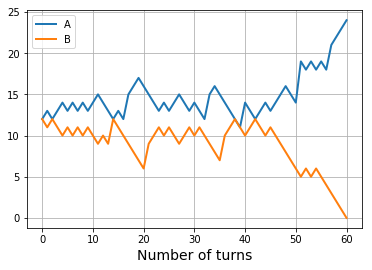

In [6]:
deck = shuffle_cards(new_card_deck())
A, B = split_cards(deck)

nb_A, nb_B, wgt_A, wgt_B, nb_war, winner = play_bataille(A,B)
print(winner)

plot(nb_A, lw=2)
plot(nb_B, lw=2)
xlabel('Number of turns', fontsize=14)
grid(True)
legend(('A','B'))

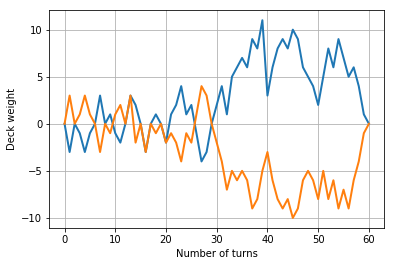

In [7]:
plot(wgt_A, lw=2)
plot(wgt_B, lw=2)
grid(True)
xlabel('Number of turns')
ylabel('Deck weight')

In [8]:
# fait un nombre N de partie et affiche les statistiques
def play_N_batailles(N, lowest_rank=8):
    nb_manches = []
    winners = []
    initial_weights = []
    for idx in range(N):
        A, B = split_cards(shuffle_cards(new_card_deck(lowest=lowest_rank)))
        nb_A, nb_B, wgt_A, wgt_B, nb_war, winner = play_bataille(A,B)
        nb_manches.append(len(nb_A))
        winners.append(winner)
        initial_weights.append((wgt_A[0], wgt_B[0]))
    return nb_manches, winners, initial_weights

In [9]:
N = 10000
nb_manches1, winners1, initial_weights1 = play_N_batailles(N, lowest_rank=9)
nb_manches2, winners2, initial_weights2 = play_N_batailles(N, lowest_rank=1)

C:\Users\JH218595\Documents\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\JH218595\Documents\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


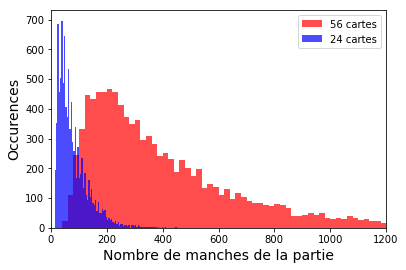

In [10]:
ax2=hist(nb_manches2, bins=N/100, color='r', alpha=0.7, range=(0,2000))
ax1=hist(nb_manches1, bins=N/100, color='b', alpha=0.7)
xlabel('Nombre de manches de la partie', fontsize=14)
ylabel('Occurences', fontsize=14)
xlim(1, 1200)
legend(('56 cartes','24 cartes'))

## Probability fitting

In [11]:
import scipy.stats as stats

In [12]:
# returns shape, loc, scale parameters
params1 = stats.lognorm.fit(nb_manches1, scale=N/10)
print(params1)
params2 = stats.lognorm.fit(nb_manches2, scale=N/10)
print(params2)

(0.76825001139550975, 6.9382395848682989, 54.066795693869572)
(0.75343335422234536, 21.152101695918425, 302.38935130829731)


C:\Users\JH218595\Documents\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\JH218595\Documents\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


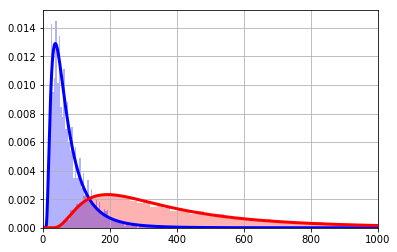

In [13]:
x = arange(1,N)
pdf1 = stats.lognorm.pdf(x, *params1[:-2], loc=params1[-2], scale=params1[-1])
pdf2 = stats.lognorm.pdf(x, *params2[:-2], loc=params2[-2], scale=params2[-1])

plot(x, pdf1, lw=3, color='b')
plot(x, pdf2, lw=3, color='r')
ax2=hist(nb_manches2, bins=N/100, color='r', alpha=0.3, range=(0,2000), normed=True)
ax1=hist(nb_manches1, bins=N/100, color='b', alpha=0.3, normed=True)
xlim(0,1000)
grid(True)
#ylim(0,300)

C:\Users\JH218595\Documents\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\JH218595\Documents\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


(1, 1000)

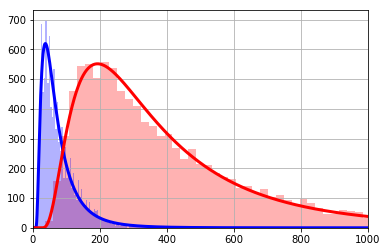

In [14]:
# not normalized histogram and fit
ax2=hist(nb_manches2, bins=N/100, color='r', alpha=0.3)
ax1=hist(nb_manches1, bins=N/100, color='b', alpha=0.3)
# in order to scale the pdf, must multiply by data_length*bins_width
plot(x,  len(nb_manches1)*(ax1[1][2]-ax1[1][1])*pdf1, lw=3, color='b')
plot(x,  len(nb_manches2)*(ax2[1][2]-ax2[1][1])*pdf2, lw=3, color='r')

grid(True)
xlim(1,1000)